<a href="https://colab.research.google.com/github/agasthya-karna/MacLear/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
# from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

**Loading data**

In [4]:
path='/content/drive/MyDrive/IRIS.csv'
df=pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Exploratory Data Analysis**

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 5)

In [10]:
df.size

750

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.duplicated().sum()

3

In [16]:
df.drop(['species'],axis = 1).skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [17]:
df.drop(['species'],axis = 1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


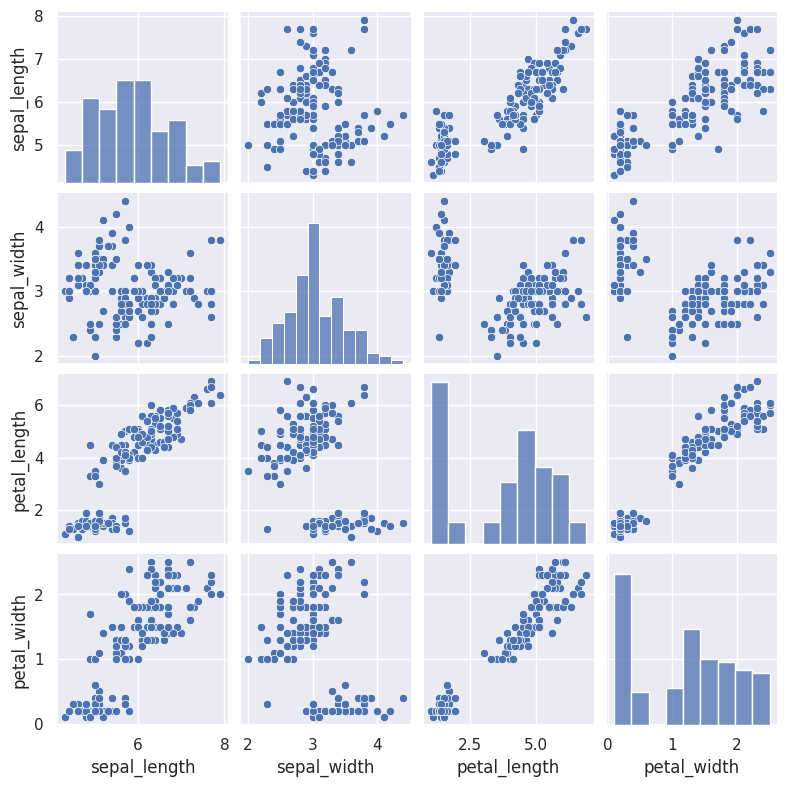

In [18]:
sns.pairplot(df,height=2)
plt.show()

**DistPlot**

<Figure size 1000x600 with 0 Axes>

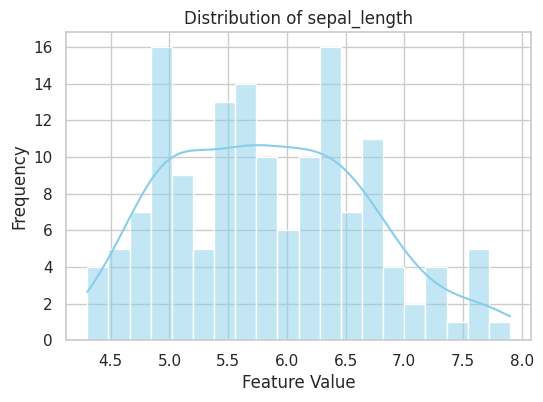

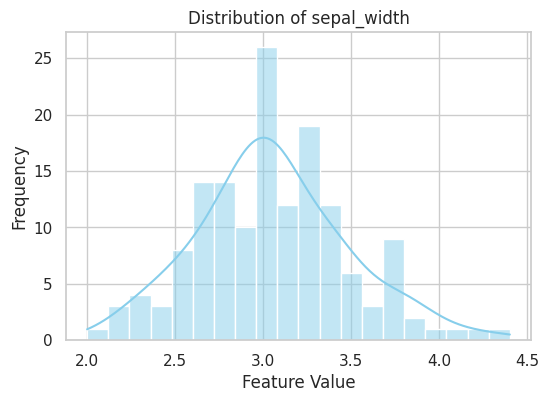

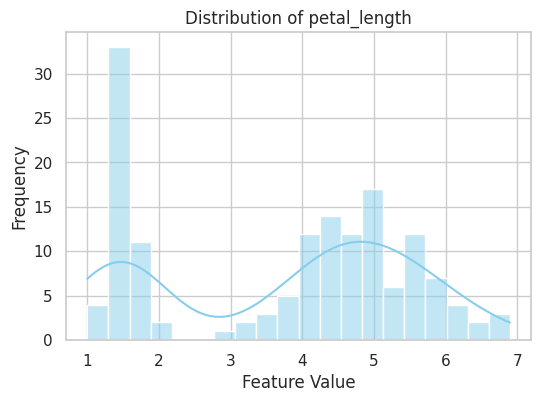

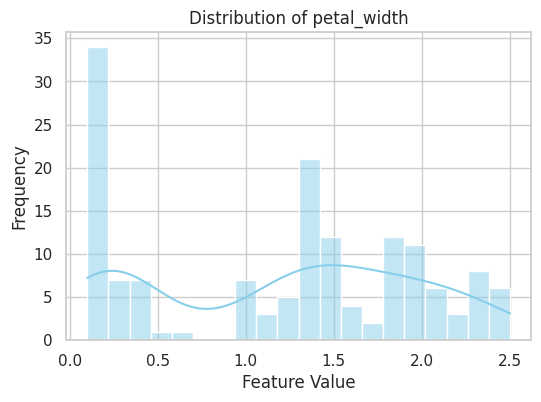

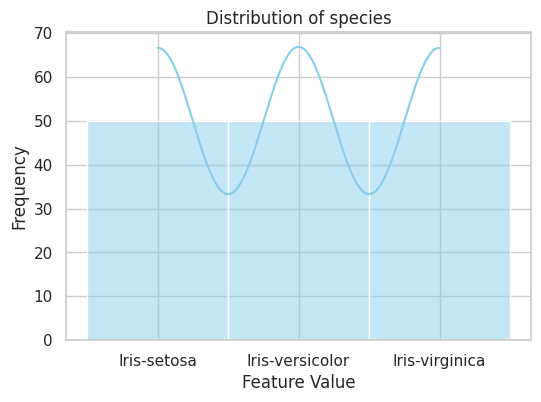

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for feature in df.columns:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title("Distribution of {}".format(feature))
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.show()

**Histograms for the features**

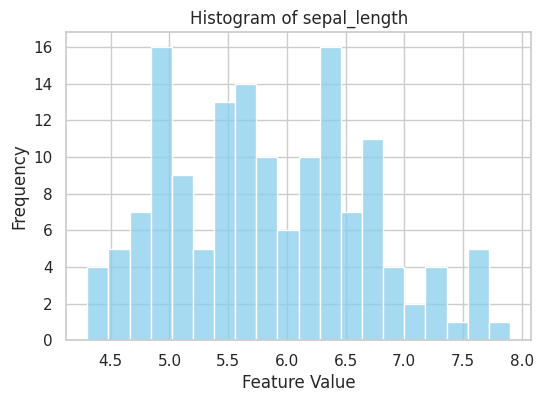

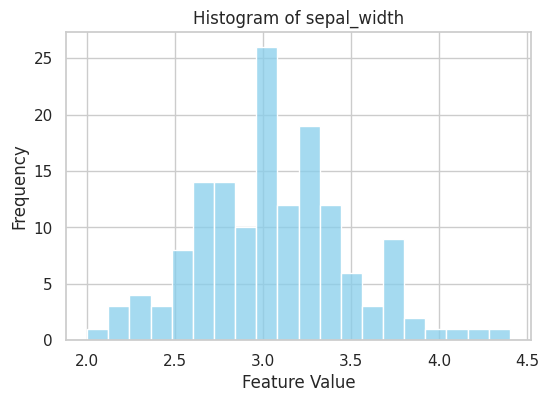

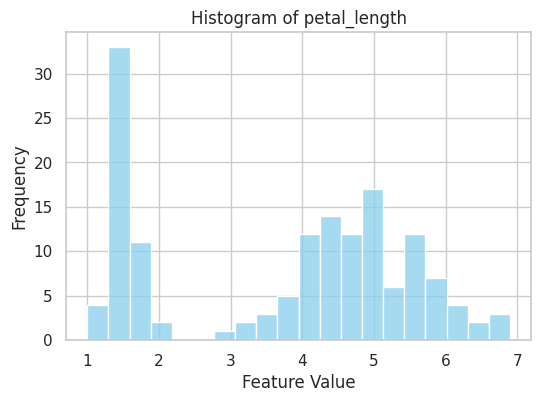

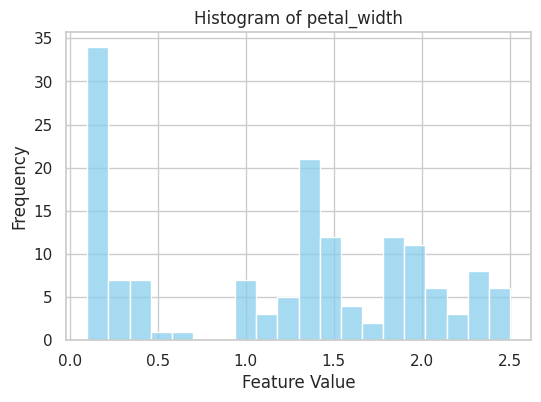

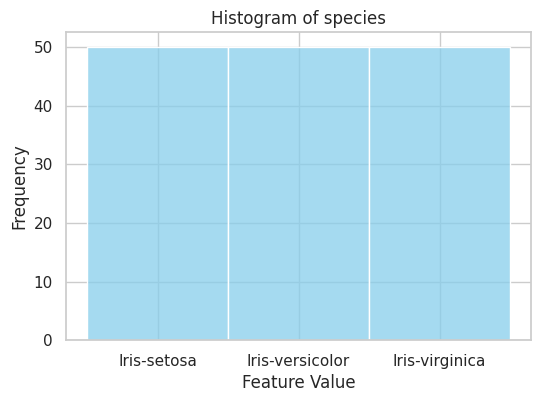

In [22]:
sns.set(style="whitegrid")

# Loop through each feature and plot a histogram separately
for feature in df.columns:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.histplot(df[feature], bins=20, color='skyblue')
    plt.title("Histogram of {}".format(feature))
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.show()

**Violin plot**

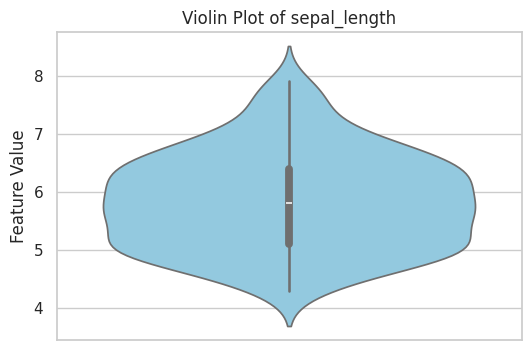

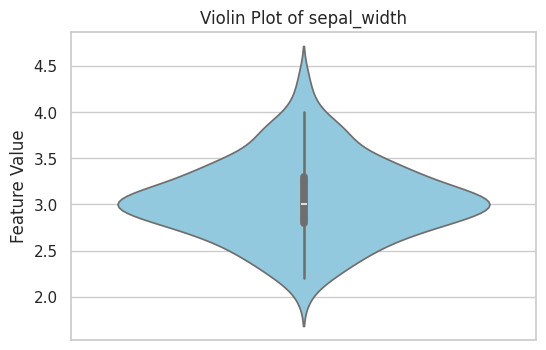

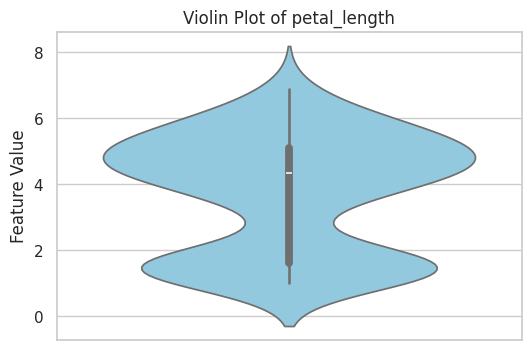

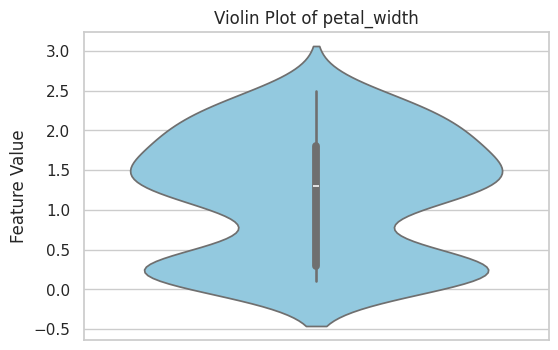

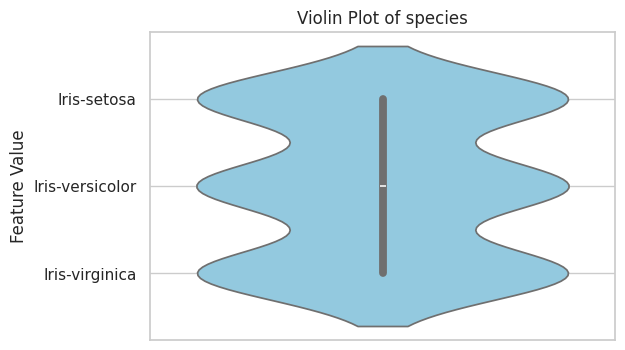

In [23]:
sns.set(style="whitegrid")

# Loop through each feature and plot a violin plot separately
for feature in df.columns:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.violinplot(y=df[feature], color='skyblue')
    plt.title("Violin Plot of {}".format(feature))
    plt.ylabel("Feature Value")
    plt.show()

**Heatmap**

<ipython-input-34-ef54084ea54b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


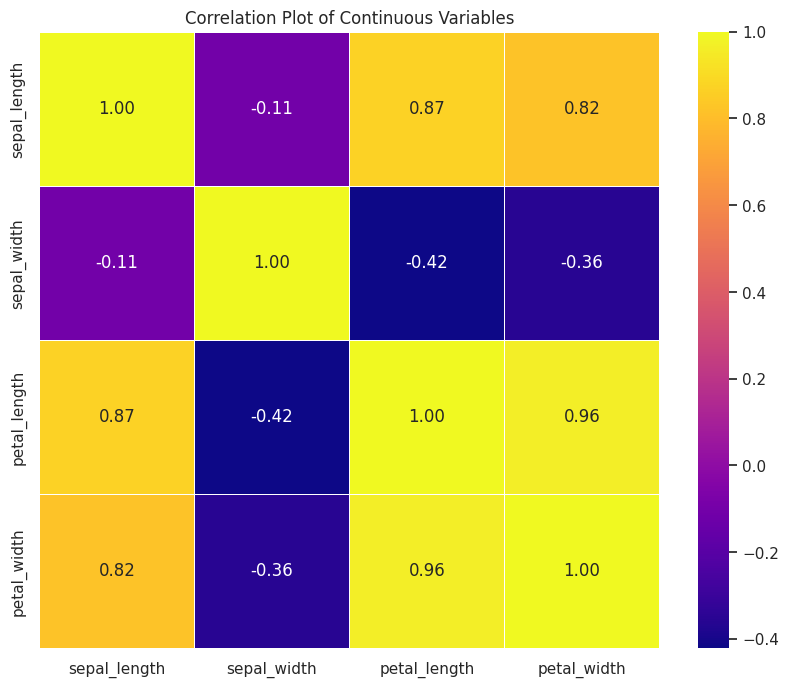

In [34]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Continuous Variables")
plt.show()

**Bar plots**

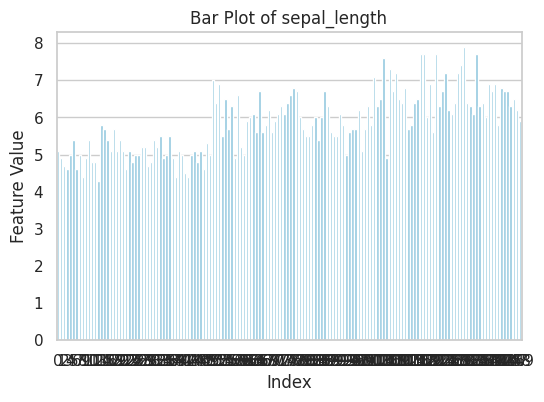

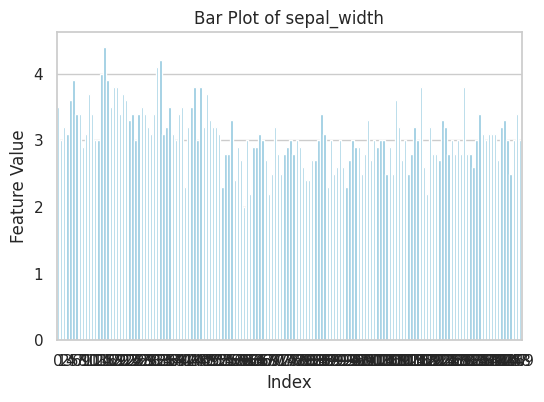

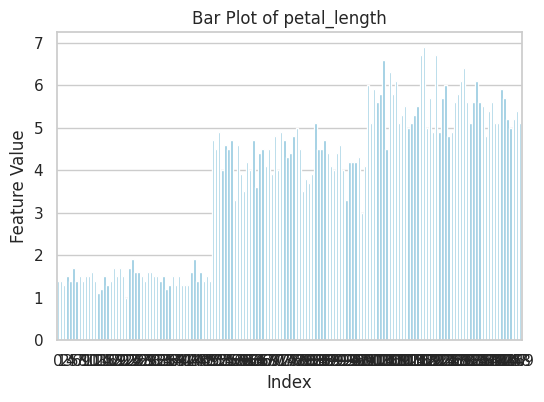

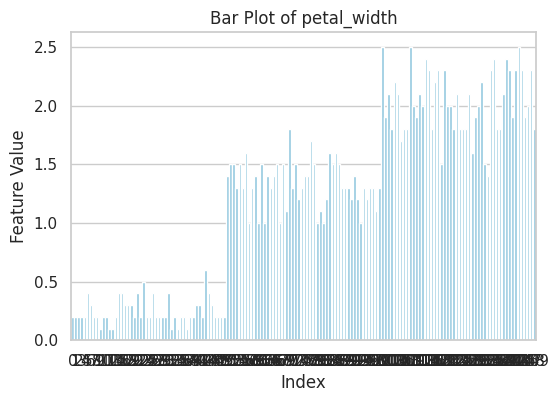

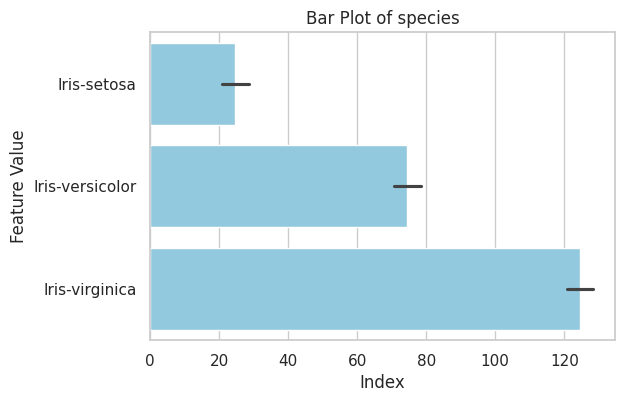

In [35]:
sns.set(style="whitegrid")  # Set the style

# Loop through each feature and plot a bar plot separately
for feature in df.columns:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.barplot(x=df.index, y=df[feature], color='skyblue')
    plt.title("Bar Plot of {}".format(feature))
    plt.xlabel("Index")
    plt.ylabel("Feature Value")
    plt.show()

In [36]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

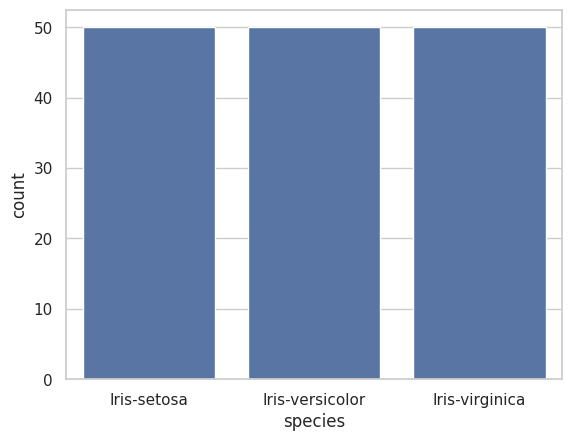

In [37]:
sns.countplot(x = 'species',data=df)
plt.show()

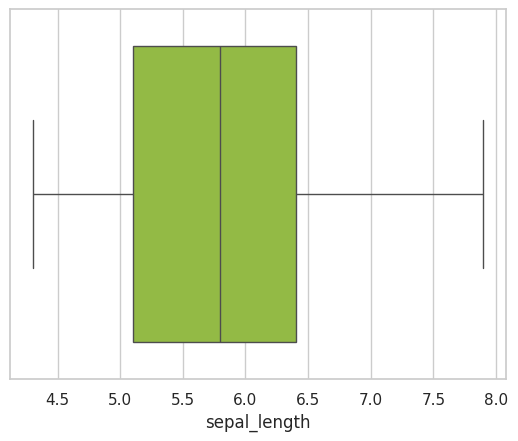

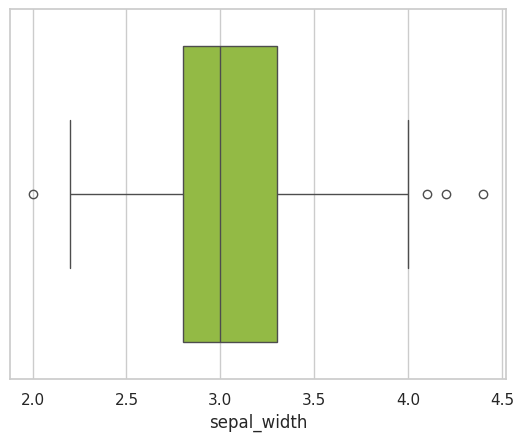

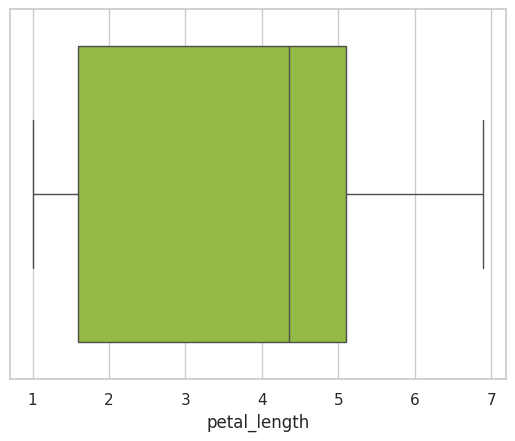

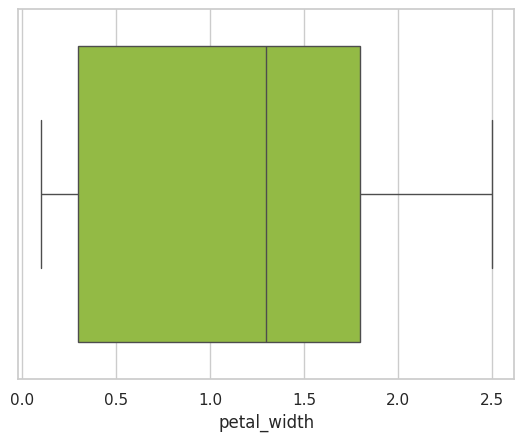

In [38]:
x = df.drop(['species'],axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'yellowgreen')   #Sepalwidthcm has outliers
    plt.xlabel(i)
    plt.show()

**Scatter plot**

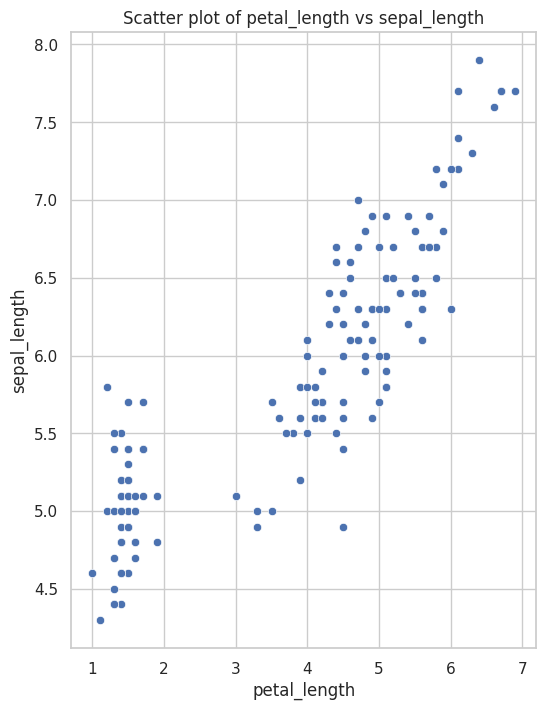

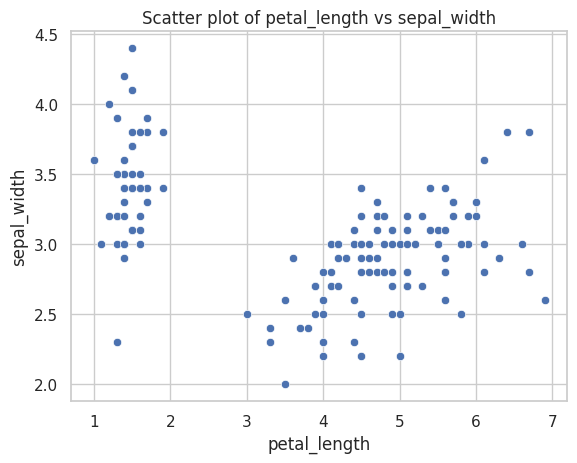

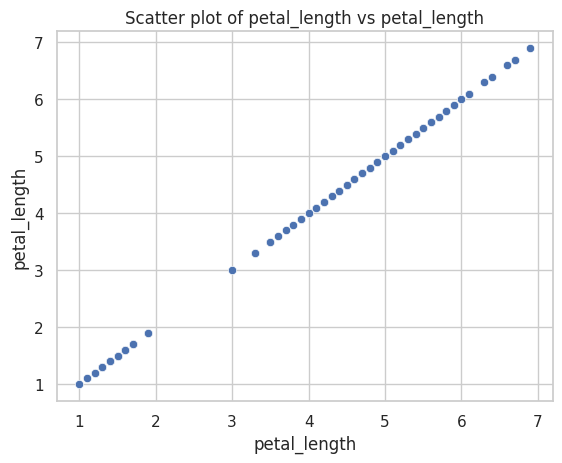

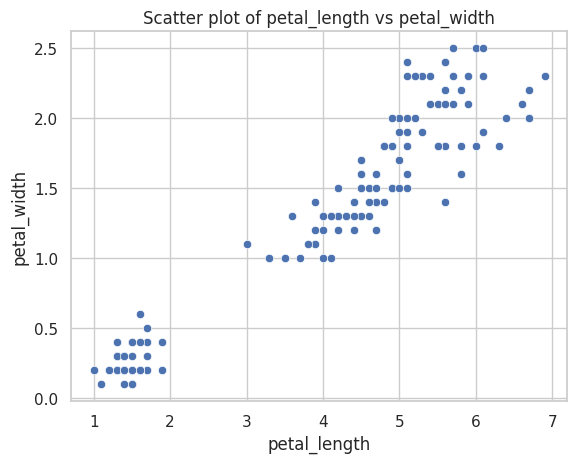

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(6, 8))
x = 'petal_length'

for i in df.columns[:-1]:
    sns.scatterplot(x=x, y=i, data=df)
    plt.title(f"Scatter plot of {x} vs {i}")
    plt.show()

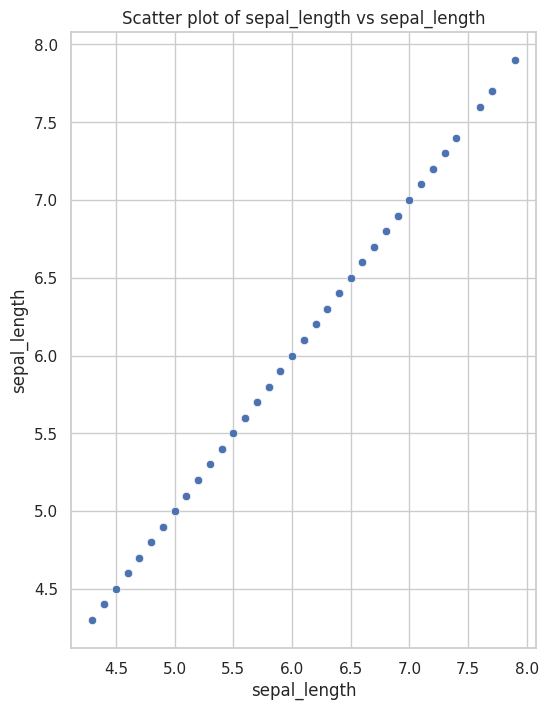

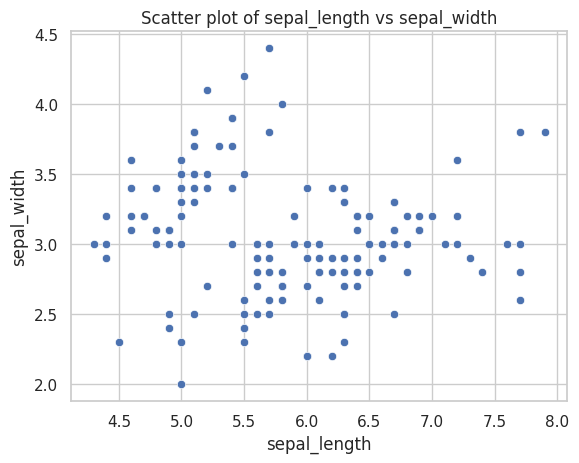

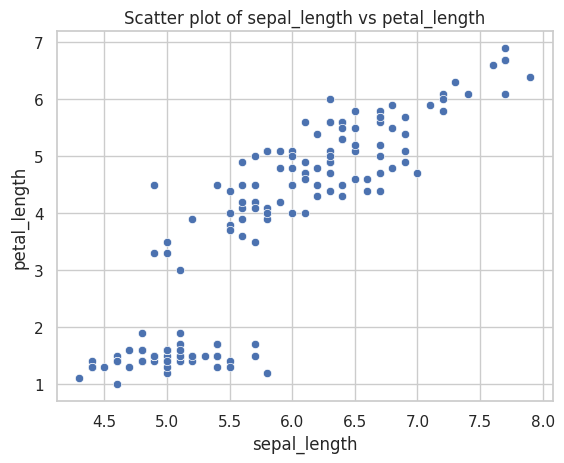

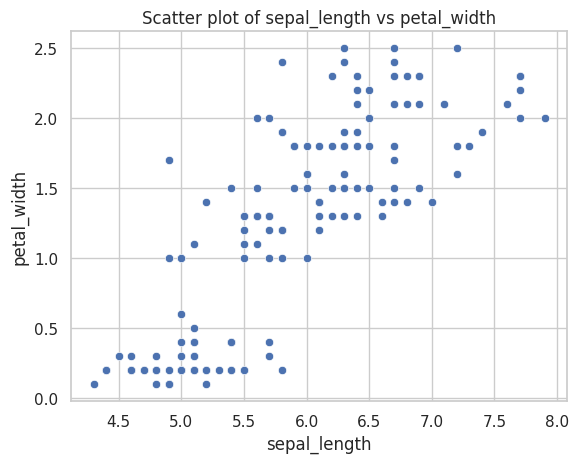

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(6, 8))
x = 'sepal_length'

for i in df.columns[:-1]:
    sns.scatterplot(x=x, y=i, data=df)
    plt.title(f"Scatter plot of {x} vs {i}")
    plt.show()

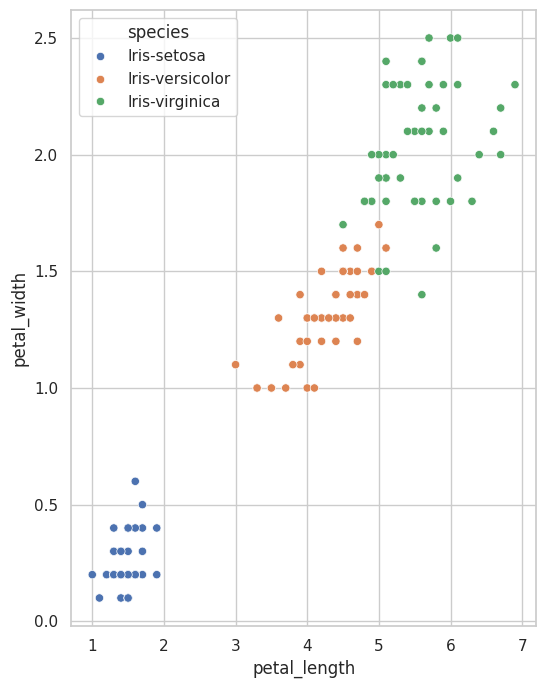

In [42]:
plt.figure(figsize=(6,8))
sns.scatterplot(x = 'petal_length' ,y = 'petal_width', hue = 'species',data = df)
plt.show()

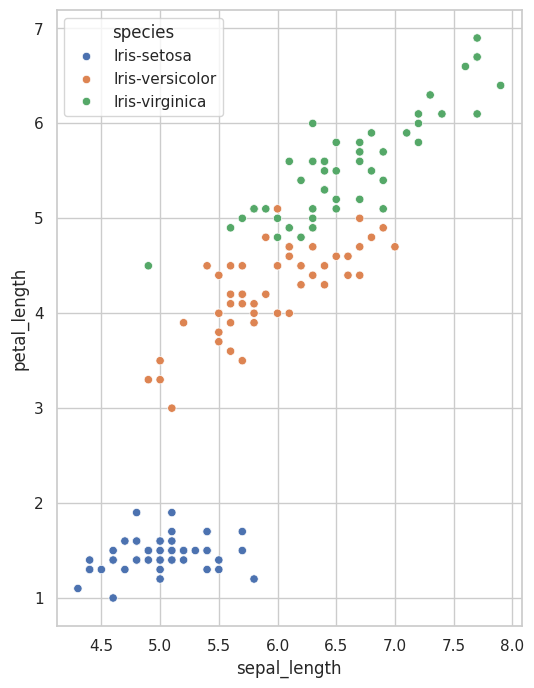

In [43]:
plt.figure(figsize=(6,8))
sns.scatterplot(x = 'sepal_length' ,y = 'petal_length', hue = 'species',data = df)
plt.show()

In [44]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
c1='species'
label_encoder = preprocessing.LabelEncoder()
df[c1]= label_encoder.fit_transform(df[c1])
df[c1].unique()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **Feature Selection and Scaling**

In [46]:
X = df.drop(['species'],axis = 1)
Y = df['species']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# **Predictions**

**Logistic regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9555555555555556
Precision: 0.9614814814814815
Recall: 0.9555555555555556
F1-score: 0.9555555555555556
Confusion Matrix:
 [[17  0  0]
 [ 0 13  0]
 [ 0  2 13]]


**RandomForest**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9778061586490706
Confusion Matrix:
 [[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


**Naive Bayes**

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9333333333333333
Precision: 0.9349206349206349
Recall: 0.9333333333333333
F1-score: 0.9334184759472117
Confusion Matrix:
 [[17  0  0]
 [ 0 12  1]
 [ 0  2 13]]


**Decision Tree Classifier**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9778061586490706
Confusion Matrix:
 [[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


**XGBoost**

In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(set(y_train)),  # Number of classes
    'max_depth': 3,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'subsample': 0.7,  # Subsample ratio of the training instances
    'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)
y_pred = xgb_model.predict(dtest)


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9555555555555556
Precision: 0.9567901234567902
Recall: 0.9555555555555556
F1-score: 0.9554898741105637
Confusion Matrix:
 [[17  0  0]
 [ 1 12  0]
 [ 0  1 14]]


**Gradient Boosting**

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)



In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9778061586490706
Confusion Matrix:
 [[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


**Neural Netorks**

In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/50
4/4 [==============================] - 2s 10ms/step - loss: 0.6306 - accuracy: 0.5810
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.4056 - accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1400 - accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: -0.1921 - accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: -0.6457 - accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: -1.1660 - accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: -2.0172 - accuracy: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: -3.0990 - accuracy: 0.6667
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: -4.7249 - accuracy: 0.6667
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: -6.8522 - accuracy: 0.6667
Epoch 11/50
4/4 [=========

In [79]:
# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6444444444444445
Precision: 0.5072796934865901
Recall: 0.6444444444444445
F1-score: 0.5451659451659452
Confusion Matrix:
 [[16  1  0]
 [ 0 13  0]
 [ 0 15  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can observe that these classifiers performed well when compared to others-
RandomForest

*   RandomForest
*   Decision Tree
*   Gradient Boosting

of about having accuracy 97% which is way good.
(RandomForest is a varient of decision tree classifier so its given a good accuracy)